# 1. 서울시 생활인구 이동행렬 생성 #

In [1]:
import pandas as pd
dts = pd.read_csv('rawDataset\생활이동_자치구_2025.07_00시.csv', encoding='CP949')
dts.head(n=10)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202507,일,0,11010,11010,F,0,EE,54,27.83
1,202507,일,0,11010,11010,F,10,EE,5,11.94
2,202507,일,0,11010,11010,F,10,EH,19,6.05
3,202507,일,0,11010,11010,F,10,HH,51,11.96
4,202507,일,0,11010,11010,F,10,HW,9,6.01
5,202507,일,0,11010,11010,F,10,WH,55,35.70
6,202507,일,0,11010,11010,F,15,EE,29,64.91
7,202507,일,0,11010,11010,F,15,EH,57,88.98
8,202507,일,0,11010,11010,F,15,EW,23,7.88
9,202507,일,0,11010,11010,F,15,HE,16,10.09


In [2]:
dts.isnull().sum()

대상연월           0
요일             0
도착시간           0
출발 시군구 코드      0
도착 시군구 코드      0
성별             0
나이             0
이동유형           0
평균 이동 시간(분)    0
이동인구(합)        0
dtype: int64

In [3]:
dts = dts[['출발 시군구 코드','도착 시군구 코드','이동인구(합)']]
dts.columns = ['startCode','destCode','pop_Sum']
dts['pop_Sum'] = pd.to_numeric(dts['pop_Sum'], errors='coerce').fillna(0)
dts = dts[(dts['startCode'] <= 11250) & (dts['destCode'] <= 11250)]
dts.loc[dts['startCode'] == dts['destCode'], 'pop_Sum'] = 0
dts = dts.groupby(['startCode','destCode'], as_index=False).agg({'pop_Sum':'sum'})

In [4]:
dts.head(10)

,startCode,destCode,pop_Sum
0,11010,11010,0.00
1,11010,11020,24316.49
2,11010,11030,9806.95
3,11010,11040,9902.52
4,11010,11050,8057.80
5,11010,11060,18333.13
6,11010,11070,7370.54
7,11010,11080,35434.36
8,11010,11090,13084.78
9,11010,11100,8293.02


In [ ]:
import pandas as pd, numpy as np

gu_dict = {
    11010:"종로구",11020:"중구",11030:"용산구",11040:"성동구",11050:"광진구",11060:"동대문구",11070:"중랑구",11080:"성북구",11090:"강북구",
    11100:"도봉구",11110:"노원구",11120:"은평구",11130:"서대문구",11140:"마포구",11150:"양천구",11160:"강서구",11170:"구로구",11180:"금천구",
    11190:"영등포구",11200:"동작구",11210:"관악구",11220:"서초구",11230:"강남구",11240:"송파구",11250:"강동구"
}

weekday_map = {"월":0, "화":1, "수":2, "목":3, "금":4, "토":5, "일":6}
week_arrs = [[] for _ in range(7)]
codes = np.array(list(gu_dict.keys()))
n_codes = len(codes)

for hour in range(24):
    hour_str = f'0{hour}' if hour < 10 else f'{hour}'
    dts = pd.read_csv(f'rawDataSet/생활이동_자치구_2025.07_{hour_str}시.csv', encoding='CP949')
    dts = dts[['요일','출발 시군구 코드','도착 시군구 코드','이동인구(합)']]
    dts.columns = ['weekday','startCode','destCode','pop_Sum']
    dts['weekday'] = dts['weekday'].map(weekday_map)
    dts = dts.apply(pd.to_numeric, errors='coerce')
    dts.loc[dts['startCode'] == dts['destCode'], 'pop_Sum'] = 0

    for weekday in range(7):
        dts_w = dts[dts['weekday'] == weekday]
        pivot = dts_w.pivot_table(index='startCode', columns='destCode', values='pop_Sum', aggfunc='sum', fill_value=0)
        pivot = pivot.reindex(index=codes, columns=codes, fill_value=0)
        week_arrs[weekday].append(pivot.values)

week_ndarrays = [np.stack(hour_list, axis=2) for hour_list in week_arrs]  
arr = np.concatenate(week_ndarrays, axis=2)
print(arr.shape)


In [ ]:
pd.DataFrame(arr[:, :, 48], index=codes, columns=codes)

,11010,11020,11030,11040,11050,11060,11070,11080,11090,11100,...,11160,11170,11180,11190,11200,11210,11220,11230,11240,11250
11010,0.00,4389.23,1261.75,1681.54,1197.28,3045.23,1199.03,5787.22,2051.44,1481.53,...,1326.28,914.83,367.12,1222.22,1046.87,1419.98,1200.43,1852.98,1604.48,1345.28
11020,4942.14,0.00,2385.69,3746.83,2104.78,4182.38,1604.88,4381.58,2112.28,1421.64,...,1423.86,1213.88,451.27,1556.22,1357.25,1587.83,1507.37,2075.61,1831.47,1387.24
11030,876.40,1471.64,0.00,1428.94,952.11,1112.93,517.06,1349.48,579.03,497.06,...,1026.75,782.98,378.29,1454.21,2183.68,1532.81,1887.50,2147.01,1021.42,564.82
11040,711.55,1858.86,831.28,0.00,4529.41,4523.45,1422.77,1438.83,639.43,532.62,...,519.55,343.29,122.51,580.87,584.62,711.55,875.38,2039.51,1565.51,1213.23
11050,337.32,561.46,283.71,4237.37,0.00,2259.18,2762.87,858.06,514.31,530.29,...,369.32,261.15,145.21,382.21,593.76,806.77,782.93,1729.61,2386.65,1943.10
11060,983.30,1456.28,346.79,3263.06,1571.47,0.00,2784.89,3070.68,821.74,538.19,...,236.46,194.06,42.71,179.69,288.68,237.16,322.73,681.23,671.67,653.06
11070,184.93,336.46,83.04,561.91,1234.54,2047.31,0.00,855.64,419.16,1068.05,...,70.49,64.54,12.25,65.42,144.63,118.18,200.52,325.92,538.58,477.79
11080,1652.17,1653.11,332.16,637.36,328.74,3292.07,874.82,0.00,3544.19,1061.75,...,237.59,120.01,60.97,167.51,253.72,334.10,332.98,626.39,500.19,289.69
11090,360.32,417.11,107.87,227.93,151.80,378.45,358.60,3430.96,0.00,4169.60,...,52.69,40.82,23.25,74.03,78.43,125.60,111.92,154.04,113.76,106.72
11100,130.13,255.63,53.86,80.69,95.34,272.60,1052.11,757.70,2398.09,0.00,...,36.24,56.12,42.80,25.02,32.93,63.49,121.75,126.24,123.80,73.53


In [ ]:
weekly_matrix = arr.sum(axis=2)
weekly_sum = weekly_matrix.sum(axis=0)-weekly_matrix.sum(axis=1)
pd.DataFrame(weekly_sum).head(n=3)

,0
0,-131841.72
1,87265.82
2,146841.57


# 2. 서울시 구별 거주인구 데이터셋 가공 #

In [ ]:
pop = pd.read_csv('rawDataset\등록인구_20250830173843.csv', encoding='utf-8-sig')
pop.head(n=2)

,동별(1),동별(2),소계,소계.1,남자,여자,소계.2,남자.1,여자.1,소계.3,남자.2,여자.2,소계.4,소계.5
0,합계,소계,4501234,9595509,4614132,4981377,9325616,4497354,4828262,269893,116778,153115,2.07,1873638
1,합계,종로구,72509,149332,71126,78206,138015,66315,71700,11317,4811,6506,1.90,30413


In [ ]:
gu_dict = {
    11010:"종로구", 11020:"중구", 11030:"용산구", 11040:"성동구", 11050:"광진구", 11060:"동대문구", 11070:"중랑구", 11080:"성북구", 11090:"강북구", 
    11100:"도봉구", 11110:"노원구", 11120:"은평구", 11130:"서대문구", 11140:"마포구", 11150:"양천구", 11160:"강서구", 11170:"구로구", 11180:"금천구", 
    11190:"영등포구", 11200:"동작구", 11210:"관악구", 11220:"서초구", 11230:"강남구", 11240:"송파구", 11250:"강동구"}

gu_dict_rev = dict(zip(gu_dict.values(), gu_dict.keys()))
pop = pop[['동별(2)', '소계.1']]
pop = pop[pop['동별(2)'] != '소계']
pop.columns = ['SIG_KOR_NM', 'pop']
pop['SIG_CD'] = pop['SIG_KOR_NM'].map(gu_dict_rev)
pop['SIG_CD'] = pop['SIG_CD'].astype(int)
pop = pop[['pop', 'SIG_CD']]
pop.head()

,pop,SIG_CD
1,149332,11010
2,129616,11020
3,216214,11030
4,280683,11040
5,350164,11050


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
seoulDistrict = gpd.read_file("rawDataset\서울_자치구_경계_2017.geojson")
seoulDistrict["SIG_CD"] = seoulDistrict["SIG_CD"].astype(int)
seoulDistrict = seoulDistrict[['SIG_CD', 'geometry']]
seoulDistrict.head()

,SIG_CD,geometry
0,11010,"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
1,11020,"POLYGON ((127.02314 37.57196, 127.02336 37.571..."
2,11030,"POLYGON ((126.96918 37.55566, 126.96917 37.554..."
3,11040,"POLYGON ((127.04341 37.57234, 127.04524 37.571..."
4,11050,"POLYGON ((127.10166 37.5724, 127.10224 37.5721..."


In [ ]:
popByDistrictGeo = seoulDistrict.merge(pop, on='SIG_CD', how='left')
popByDistrictGeo.columns = ['code', 'geometry', 'pop']
popByDistrictGeo.head(n=1)

,code,geometry,pop
0,11010,"POLYGON ((127.00864 37.58047, 127.00871 37.580...",149332


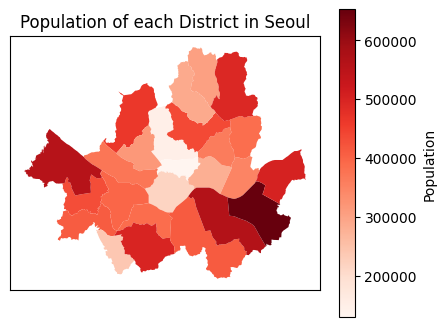

np.int64(9595509)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
popByDistrictGeo.plot(column='pop', cmap='Reds', ax=ax)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=popByDistrictGeo['pop'].min(), vmax=popByDistrictGeo['pop'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label('Population')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Population of each District in Seoul')
plt.show()
popByDistrictGeo['pop'].sum()

# 3. 인구이동 방향성 제거 #

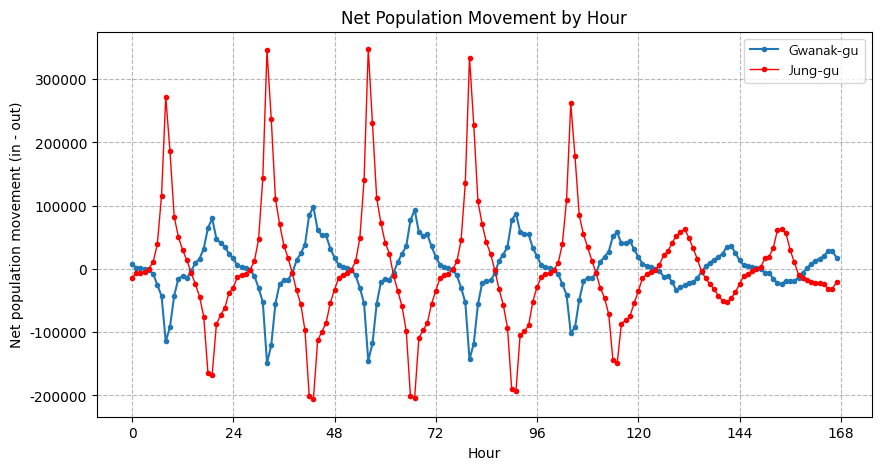

In [ ]:
import matplotlib.ticker as mticker

name = '관악구'
idx_start = np.where(codes == gu_dict_rev[name])[0][0] if gu_dict_rev[name] in codes else None
idx_dest  = np.where(codes == gu_dict_rev[name])[0][0] if gu_dict_rev[name] in codes else None
n_hour = arr.shape[2]
inflow  = arr[:, idx_dest, :].sum(axis=0) if idx_dest is not None else np.zeros(n_hour)
outflow = arr[idx_start, :, :].sum(axis=0) if idx_start is not None else np.zeros(n_hour)
y = inflow - outflow
x = np.arange(n_hour)
plt.figure(figsize=(10,5))
plt.plot(x, y, marker='.', label='Gwanak-gu')

name = '중구'
idx_start = np.where(codes == gu_dict_rev[name])[0][0] if gu_dict_rev[name] in codes else None
idx_dest  = np.where(codes == gu_dict_rev[name])[0][0] if gu_dict_rev[name] in codes else None
inflow  = arr[:, idx_dest, :].sum(axis=0) if idx_dest is not None else np.zeros(n_hour)
outflow = arr[idx_start, :, :].sum(axis=0) if idx_start is not None else np.zeros(n_hour)
y = inflow - outflow
plt.plot(x, y, c='red', label='Jung-gu', linewidth=1,  marker='.')

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xlabel("Hour")
plt.ylabel(f"Net population movement (in - out)")
plt.title(f"Net Population Movement by Hour")
plt.legend()
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(24))
plt.grid(True, which='major', linestyle='--', alpha=0.9)
plt.show()

In [ ]:
weekly_sum, weekly_sum.sum()

(array([-131841.72,   87265.82,  146841.57,  -68464.61,   32197.2 ,
          49691.9 ,    -989.55,  -35325.75,   -8921.13,  -11227.41,
         -20059.26,  -27642.91,  -93884.7 ,   22295.49,  -14456.5 ,
         240654.11,  -44268.45,  -22463.72,  -18364.18,   -4690.33,
          -9363.14,  126752.58,  -93234.41,  -46078.77,  -54422.13]),
 np.float64(5.587935447692871e-09))

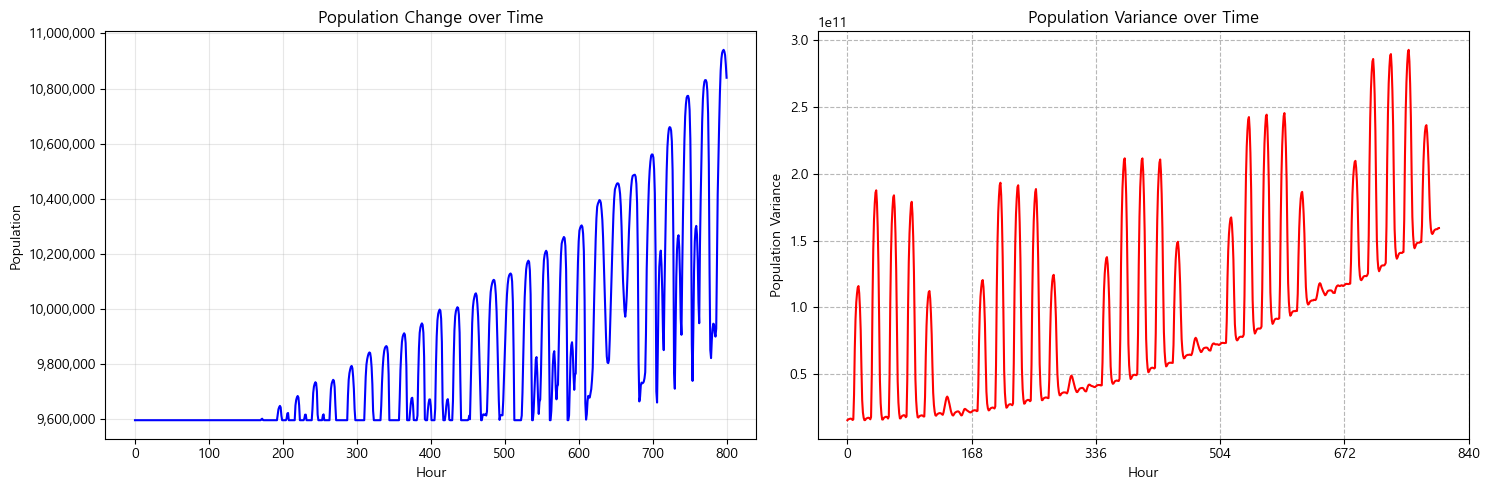

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def simulate_population(population_df, movement_matrix):
    pop = population_df['pop'].to_numpy(dtype=float)
    T = movement_matrix.shape[2]
    pops = [pop.copy()]
    for t in range(T):
        M = movement_matrix[:, :, t]
        delta = M.sum(axis=0) - M.sum(axis=1)
        delta[np.abs(delta) < 1e-12] = 0
        pop = pop + delta
        pops.append(pop.copy())
    return np.array(pops)

T_target = 800
arr_long = np.tile(arr, (1, 1, T_target // arr.shape[2] + 1))
arr_long = arr_long[:, :, :T_target]
results = simulate_population(popByDistrictGeo, arr_long)
total_pop = abs(results).sum(axis=1)
variance_pop = results.var(axis=1)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(total_pop, color='blue')
axes[0].set_title("Population Change over Time")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Population")
axes[0].grid(alpha=0.3)
axes[0].ticklabel_format(useOffset=False, style='plain', axis='y')
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
axes[1].plot(variance_pop, color='red')
axes[1].set_title("Population Variance over Time")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Population Variance")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(168))
plt.grid(True, which='major', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


In [ ]:
weekly_matrix = arr.sum(axis=2)
weekly_sum = weekly_matrix.sum(axis=0) - weekly_matrix.sum(axis=1)

positive = np.where(weekly_sum > 0)[0]
negative = np.where(weekly_sum < 0)[0]
pos_sum = weekly_sum[positive].sum()
neg_sum = -weekly_sum[negative].sum()
arr_r = arr.copy()

for p in positive:
    surplus = weekly_sum[p]
    for n in negative:
        contrib = (-weekly_sum[n]) / neg_sum
        transfer = surplus * contrib
        
        total_out_p = arr_r[p, :, :].sum()
        if total_out_p != 0:
            arr_r[p, n, :] += transfer / arr.shape[2]

weekly_sum = arr_r.sum(axis=2).sum(axis=0) - arr_r.sum(axis=2).sum(axis=1)
weekly_sum, weekly_sum.sum()

(array([ 1.86264515e-09, -1.86264515e-09,  1.86264515e-09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.31322575e-10,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -9.31322575e-10,
         1.86264515e-09, -1.86264515e-09,  0.00000000e+00,  1.86264515e-09,
         1.86264515e-09,  0.00000000e+00,  1.86264515e-09,  0.00000000e+00,
         0.00000000e+00, -3.72529030e-09, -3.72529030e-09, -1.86264515e-09,
         0.00000000e+00]),
 np.float64(-1.862645149230957e-09))

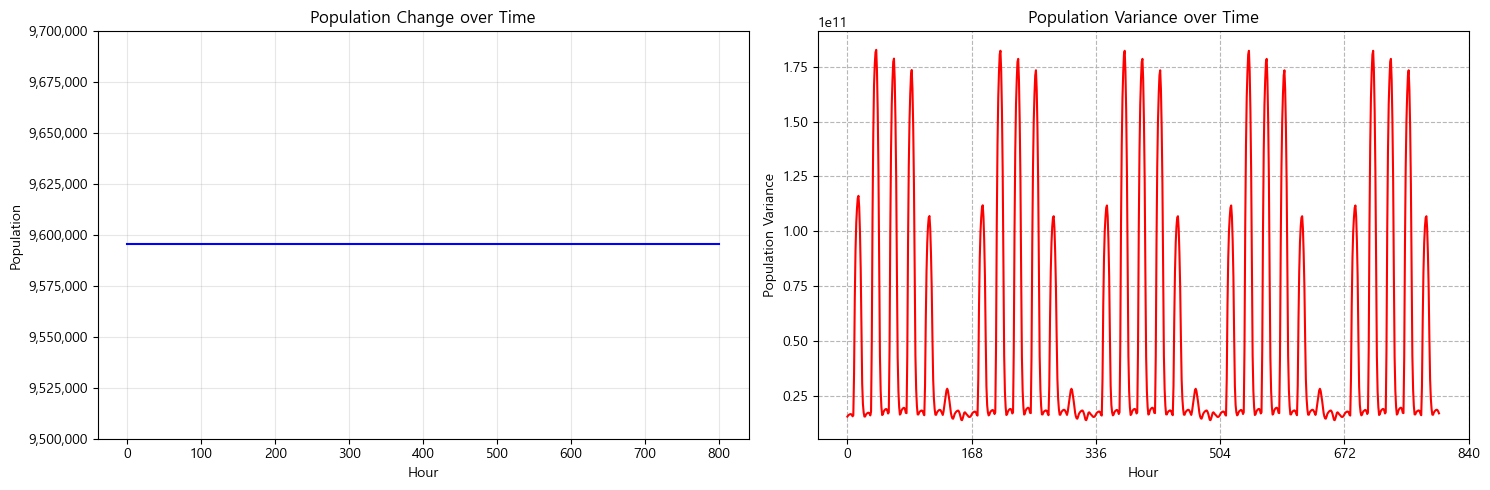

In [ ]:
def simulate_population(population_df, movement_matrix):
    pop = population_df['pop'].to_numpy(dtype=float)
    T = movement_matrix.shape[2]
    pops = [pop.copy()]
    for t in range(T):
        M = movement_matrix[:, :, t].copy()
        outflow = M.sum(axis=1)
        scale = np.ones_like(outflow)
        over = outflow > pop
        scale[over] = pop[over] / outflow[over]
        M = (M.T * scale).T
        delta = M.sum(axis=0) - M.sum(axis=1)
        pop = pop + delta
        pops.append(pop.copy())
    return np.array(pops)

T_target = 800
arr_long = np.tile(arr_r, (1, 1, T_target // arr_r.shape[2] + 1))
arr_long = arr_long[:, :, :T_target]
results = simulate_population(popByDistrictGeo, arr_long)
total_pop = abs(results).sum(axis=1)
variance_pop = results.var(axis=1)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(total_pop, color='blue')
axes[0].set_title("Population Change over Time")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Population")
axes[0].grid(alpha=0.3)
axes[0].ticklabel_format(useOffset=False, style='plain', axis='y')
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
axes[0].set_ylim(9_500_000, 9_700_000)
axes[1].plot(variance_pop, color='red')
axes[1].set_title("Population Variance over Time")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Population Variance")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(168))
plt.grid(True, which='major', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()


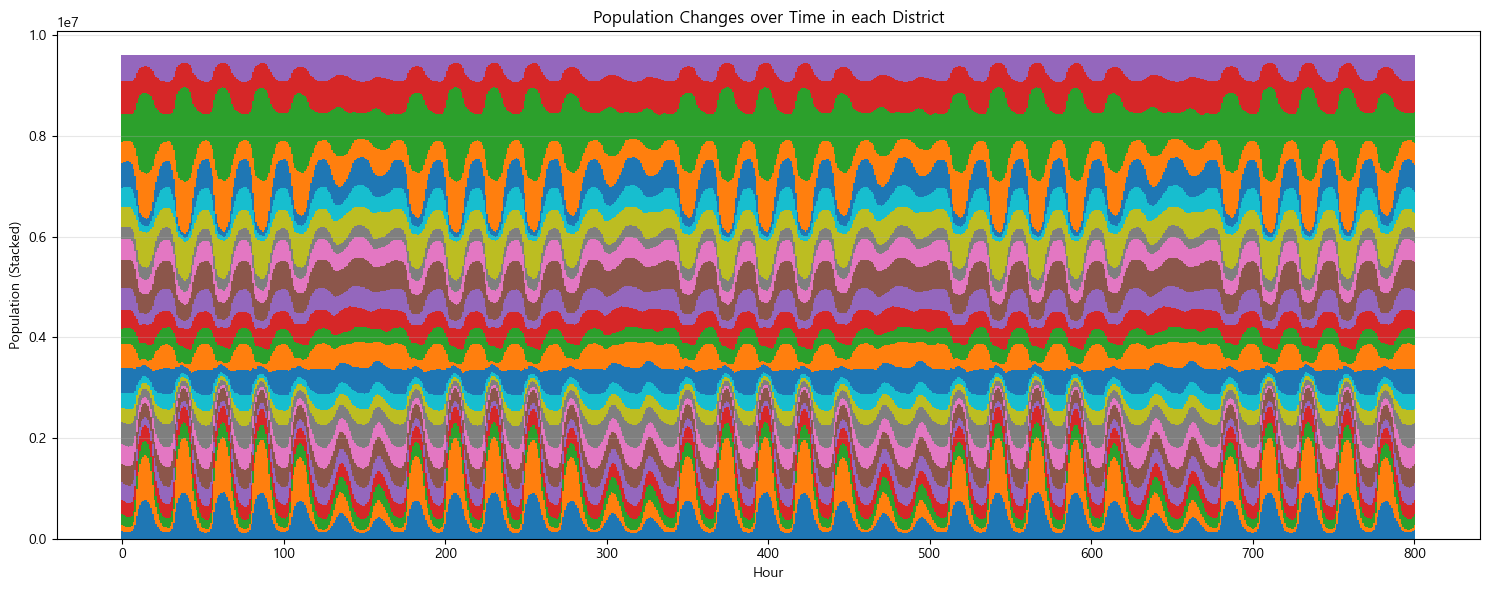

In [ ]:
T = results.shape[0]
N = results.shape[1]
hours = np.arange(T)
plt.figure(figsize=(15, 6))
bottom = np.zeros(T)
for i in range(N):
    plt.bar(hours, results[:, i], bottom=bottom, label=f'District {i}', width=1)
    bottom += results[:, i]

plt.title("Population Changes over Time in each District")
plt.xlabel("Hour")
plt.ylabel("Population (Stacked)")
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

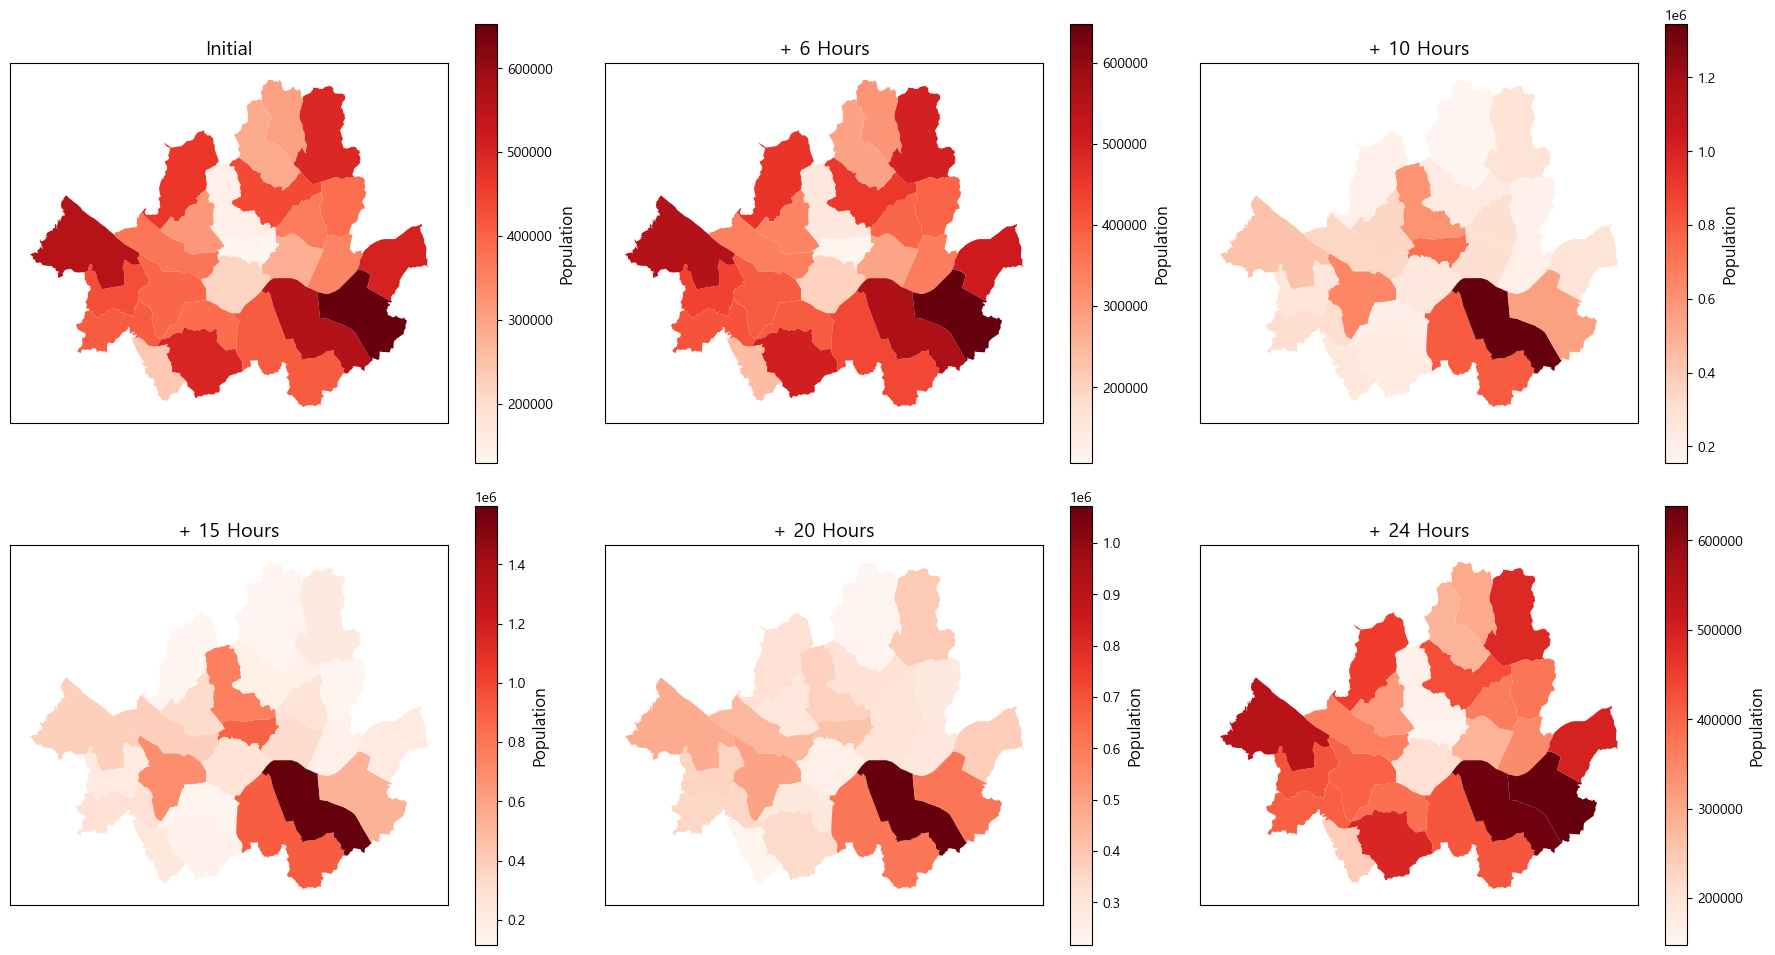

In [ ]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

def simulate_population_simple(population_df, movement_matrix, hours=None):
    pop = population_df['pop'].to_numpy(dtype=float)
    T = movement_matrix.shape[2] if hours is None else hours
    pops = [pop.copy()]
    for t in range(T):
        M = movement_matrix[:, :, t]
        pop = np.maximum(pop - M.sum(axis=1) + M.sum(axis=0), 0)
        pops.append(pop.copy())
    return pops

def plot_geodataframes_grid(gdf_list, titles, ncols=3, cmap='Reds', value_col='pop'):
    n = len(gdf_list)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows))
    axes = axes.flatten()
    for i, gdf in enumerate(gdf_list):
        gdf.plot(column=value_col, cmap=cmap, ax=axes[i])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf[value_col].min(), vmax=gdf[value_col].max()))
        sm._A = []
        cbar = fig.colorbar(sm, ax=axes[i], shrink=0.9)
        cbar.set_label('Population', fontsize=12)
        axes[i].set_title(titles[i], fontsize=14)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

hours_list = [0, 6, 10, 15, 20, 24]

T_target = max(hours_list)
arr_long = np.tile(arr_r, (1, 1, T_target//arr_r.shape[2] + 1))[:, :, :T_target]

pbw_list = []

for h in hours_list:
    pops = simulate_population_simple(popByDistrictGeo.copy(), arr_long, hours=h)
    last_pop = pops[-1].copy()
    gdf = popByDistrictGeo.copy()
    gdf['pop'] = last_pop
    gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
    gdf.set_crs(epsg=4326, inplace=True)
    pbw_list.append(gdf)

titles = [f'+ {h} Hours' if h != 0 else 'Initial' for h in hours_list]
plot_geodataframes_grid(pbw_list, titles, ncols=3)


In [ ]:
np.save('movementM.npy', arr_r)
popByDistrictGeo.to_csv('popByDistrict')

# 서울시 인구이동 양상 분석 및 이동행렬 생성 완료.

## 데이터셋의 출처 ##
- 서울시 등록인구 데이터셋: https://data.seoul.go.kr/dataList/419/S/2/datasetView.do
- 서울시 유동인구 데이터셋: https://www.data.go.kr/data/15087677/fileData.do
- 서울시 자치구별 geojson: https://github.com/cubensys/Korea_District